## Library Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_fights = pd.read_csv('../datasets/raw/ufc-master.csv')
df_rankings = pd.read_csv('../datasets/raw/rankings_history.csv')
df_fights.head()
df_rankings.head()

,date,weightclass,fighter,rank
0,2013-02-04,Pound-for-Pound,Anderson Silva,1
1,2013-02-04,Pound-for-Pound,Jon Jones,2
2,2013-02-04,Pound-for-Pound,Georges St. Pierre,3
3,2013-02-04,Pound-for-Pound,José Aldo,4
4,2013-02-04,Pound-for-Pound,Benson Henderson,5


In [3]:
# Handle missing values in numeric columns
numeric_cols = df_fights.select_dtypes(include=[np.number]).columns
df_fights[numeric_cols] = df_fights[numeric_cols].fillna(0)

Machine learning models cannot process missing (NaN) values
For fight statistics, a missing value often indicates that the stat didn't occur, making 0 a logical replacement

In [4]:
# Encode Winner column
df_fights['Winner'] = df_fights['Winner'].map({'Red': 1, 'Blue': 0})

## Feature Creation

In [5]:
# Select relevant features
features = [
    # Fighter Records
    'RedWins', 'RedLosses', 'RedDraws',
    'BlueWins', 'BlueLosses', 'BlueDraws',
    
    # Win Streaks
    'RedCurrentWinStreak', 'BlueCurrentWinStreak',
    'RedLongestWinStreak', 'BlueLongestWinStreak',
    
    # Strike Statistics
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
    'RedAvgSigStrPct', 'BlueAvgSigStrPct',

    # Grappling Statistics
    'RedAvgTDLanded', 'BlueAvgTDLanded',
    'RedAvgTDPct', 'BlueAvgTDPct',
    'RedAvgSubAtt', 'BlueAvgSubAtt'
]

# Create feature matrix X
X = df_fights[features]

# Create target vector y
y = df_fights['Winner']

We're using a curated set of features that are most relevant for fight prediction and defining our feature matrix X and target vector y

## Model Parameters

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Creation and Training

In [7]:
# Initialize RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42    # For reproducibility
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [8]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")

# Calcuate Performanance
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Model Accuracy: 0.596

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.34      0.42       543
           1       0.62      0.78      0.69       755

    accuracy                           0.60      1298
   macro avg       0.57      0.56      0.55      1298
weighted avg       0.58      0.60      0.58      1298



Initial Results Analysis:
The model achieves an accuracy of approximately 60% on the test set which is slightly better than random chance (50%).

## Model Improvement

### Feature Engineering

In [9]:
# Calculate win percentages
df_fights['RedWinPercentage'] = df_fights['RedWins'] / (df_fights['RedWins'] + df_fights['RedLosses'] + df_fights['RedDraws'])
df_fights['BlueWinPercentage'] = df_fights['BlueWins'] / (df_fights['BlueWins'] + df_fights['BlueLosses'] + df_fights['BlueDraws'])

/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/2002080841.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['RedWinPercentage'] = df_fights['RedWins'] / (df_fights['RedWins'] + df_fights['RedLosses'] + df_fights['RedDraws'])
/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/2002080841.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['BlueWinPercentage'] = df_fights['BlueWins'] / (df_fights['BlueWins'] + df_fights['BlueLosses'] + df_fights['BlueDraws'])


This feature provides:
Overall career success rate
More normalized view of fighter performance
Accounts for different career lengths

In [10]:
# Calculate striking differentials
df_fights['StrikingEfficiencyDiff'] = df_fights['RedAvgSigStrPct'] - df_fights['BlueAvgSigStrPct']
df_fights['StrikesLandedDiff'] = df_fights['RedAvgSigStrLanded'] - df_fights['BlueAvgSigStrLanded']

/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3012358973.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['StrikingEfficiencyDiff'] = df_fights['RedAvgSigStrPct'] - df_fights['BlueAvgSigStrPct']
/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3012358973.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['StrikesLandedDiff'] = df_fights['RedAvgSigStrLanded'] - df_fights['BlueAvgSigStrLanded']


This captures:
Technical striking advantage
Volume striking advantage
Overall striking dominance

In [11]:
# Calculate grappling differentials
df_fights['TakedownEfficiencyDiff'] = df_fights['RedAvgTDPct'] - df_fights['BlueAvgTDPct']
df_fights['TakedownsLandedDiff'] = df_fights['RedAvgTDLanded'] - df_fights['BlueAvgTDLanded']

/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3128488030.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['TakedownEfficiencyDiff'] = df_fights['RedAvgTDPct'] - df_fights['BlueAvgTDPct']
/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3128488030.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['TakedownsLandedDiff'] = df_fights['RedAvgTDLanded'] - df_fights['BlueAvgTDLanded']


This captures:
Wrestling effectiveness
Control potential
Grappling dominance

In [12]:
# Calculate experience metrics
df_fights['ExperienceDiff'] = (df_fights['RedTotalRoundsFought'] - df_fights['BlueTotalRoundsFought'])
df_fights['TitleBoutExperienceDiff'] = (df_fights['RedTotalTitleBouts'] - df_fights['BlueTotalTitleBouts'])

/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3842956160.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['ExperienceDiff'] = (df_fights['RedTotalRoundsFought'] - df_fights['BlueTotalRoundsFought'])
/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3842956160.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['TitleBoutExperienceDiff'] = (df_fights['RedTotalTitleBouts'] - df_fights['BlueTotalTitleBouts'])


This captures:
Fight experience gap
High-level competition experience
Career longevity difference

In [13]:
# Calculate finish rates
df_fights['RedFinishRate'] = (df_fights['RedWinsByKO'] + df_fights['RedWinsBySubmission']) / df_fights['RedWins']
df_fights['BlueFinishRate'] = (df_fights['BlueWinsByKO'] + df_fights['BlueWinsBySubmission']) / df_fights['BlueWins']

/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3239371059.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['RedFinishRate'] = (df_fights['RedWinsByKO'] + df_fights['RedWinsBySubmission']) / df_fights['RedWins']
/var/folders/lm/vmc4lzzj2jlbrpn8rcrj3hbc0000gn/T/ipykernel_15071/3239371059.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fights['BlueFinishRate'] = (df_fights['BlueWinsByKO'] + df_fights['BlueWinsBySubmission']) / df_fights['BlueWins']


This shows:
Finishing ability
Fight-ending power
Submission prowess

In [14]:
# Clean up any infinity or NaN values created during calculations
df_fights = df_fights.replace([np.inf, -np.inf], 0)
df_fights = df_fights.fillna(0)

Clean up calculated feature columns by checking for problematic values like infinity or extremely large values and replacing inf and -inf with 0

## Improved Model Assessment

In [15]:
enhanced_features = features + ['RedWinPercentage', 'BlueWinPercentage',
    'StrikingEfficiencyDiff', 'StrikesLandedDiff',
    'TakedownEfficiencyDiff', 'TakedownsLandedDiff',
    'ExperienceDiff', 'TitleBoutExperienceDiff',
    'RedFinishRate', 'BlueFinishRate'
]

# Create feature matrix X
X = df_fights[enhanced_features]

# Create target vector y
y = df_fights['Winner']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Fitting

In [17]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

### Model Prediction and Evaluation

In [18]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print model performance
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': enhanced_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Model Accuracy: 0.609

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.27      0.37       543
           1       0.62      0.85      0.72       755

    accuracy                           0.61      1298
   macro avg       0.59      0.56      0.54      1298
weighted avg       0.60      0.61      0.57      1298


Top 10 Most Important Features:
                   feature  importance
23       StrikesLandedDiff    0.063454
22  StrikingEfficiencyDiff    0.059861
25     TakedownsLandedDiff    0.058380
12         RedAvgSigStrPct    0.052452
10      RedAvgSigStrLanded    0.052419
13        BlueAvgSigStrPct    0.052339
24  TakedownEfficiencyDiff    0.052297
11     BlueAvgSigStrLanded    0.046219
26          ExperienceDiff    0.045631
14          RedAvgTDLanded    0.043850


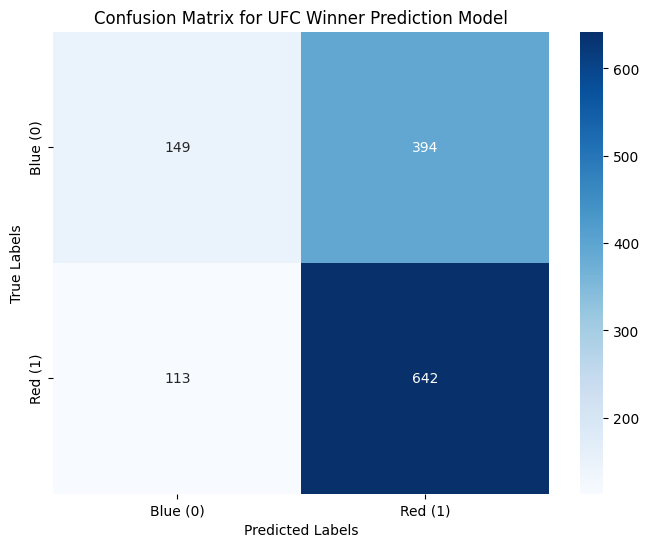

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Blue (0)", "Red (1)"], yticklabels=["Blue (0)", "Red (1)"])
plt.title("Confusion Matrix for UFC Winner Prediction Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()